# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import missingno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


# Read_Data

In [3]:
data=pd.read_csv('50_StartUp_for_train.csv')
df=copy.deepcopy(data)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Check and drop Duplicated

In [4]:
df.duplicated().sum()

0

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# Get Information of Data

In [6]:
df.shape

(50, 5)

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.describe(include=['object'])

,State
count,50
unique,3
top,New York
freq,17


In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

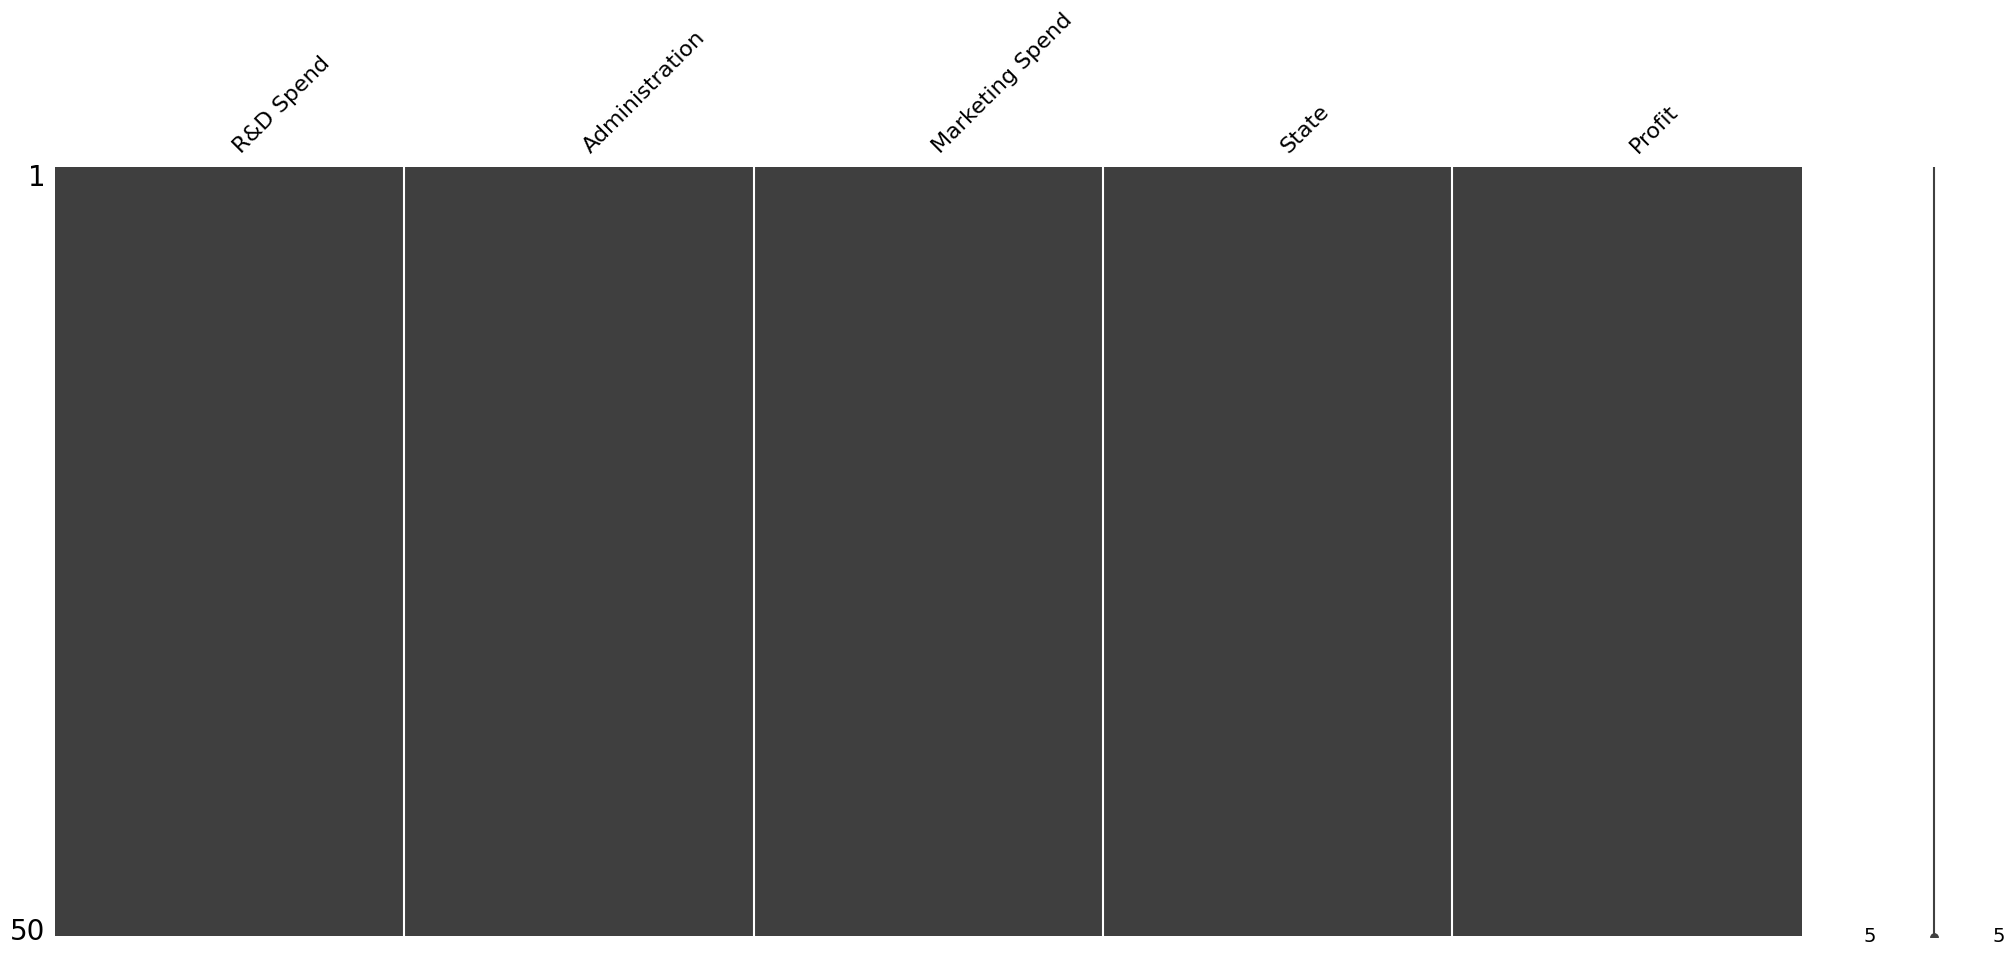

In [10]:
missingno.matrix(df)
# missingno.bar(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
df.columns.tolist()

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

# Drop columns that aren't useful

In [13]:
# df.drop(['',''],axis=1,inplace=True)
# df.head()

# Removing Rows with Missing Values

In [14]:
# df.dropna(subset=['Glucose','Diastolic_BP'], inplace=True)
# df.isnull().sum()

# Filling Missing Values

## Filling Missing Values for all DataFrame

In [15]:
# Fill with a constant value
# df = df.fillna(0)

# Fill with the mean value
# df = df.fillna(df.mean())

# Fill with the median value
# df = df.fillna(df.median())

# Fill with the most frequent value (mode)
# df = df.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Interpolation (linear)
# df = df.interpolate()

## Identify columns with missing values

In [16]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


## Filling Missing Values for each column

In [17]:
# Fill with a constant value
# df[['Serum_Insulin']] = df[['Serum_Insulin']].fillna(0)

# Fill with the mean value
# df[['Marketing Spend']] = df[['Marketing Spend']].fillna(df[['Marketing Spend']].mean())

# Fill with the median value
# df[['Serum_Insulin']] = df[['Serum_Insulin']].fillna(df[['Marketing Spend']].median())

# Fill with the most frequent value (mode)
# df[['Marketing Spend']] = df[['Marketing Spend']].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Interpolation (linear)
# df[['Marketing Spend']] = df[['Marketing Spend']].interpolate()

# df.head()

## Check the Missing Values

In [18]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Check balance for Output (Classification_train)

In [19]:
# y_out = 'Profit'
# df[y_out].value_counts()

In [20]:
# # engine-location as variable
# engine_loc_counts = df[y_out].value_counts().to_frame()
# engine_loc_counts.rename(columns={y_out: 'value_counts'}, inplace=True)
# engine_loc_counts.index.name = 'name'
# engine_loc_counts.head(10)

In [21]:
# # Seaborn count plot with customizations
# plt.figure(figsize=(8, 6))  # Set the figure size
# sns.countplot(data=df, x=y_out, hue=y_out, palette='magma', order=df[y_out].value_counts().index, edgecolor='black', legend=False)
# plt.xlabel(y_out, fontsize=14)  # Set x-axis label with font size
# plt.ylabel('Count', fontsize=14)  # Set y-axis label with font size
# plt.title('Count Plot', fontsize=16)  # Set title with font size
# plt.grid(True, linestyle='--', linewidth=0.8, alpha=0.3)  # Add grid lines with custom style
# plt.xticks(fontsize=12)  # Set font size for x-axis ticks
# plt.yticks(fontsize=12)  # Set font size for y-axis ticks
# plt.legend(set(df[y_out]), loc='upper right')  # Add legend
# plt.show()

# Check balance for Output (Regression_train)

INFO:root:Binning the data for column: Profit into 4 bins
INFO:root:Creating count plot for binned data of column: Profit


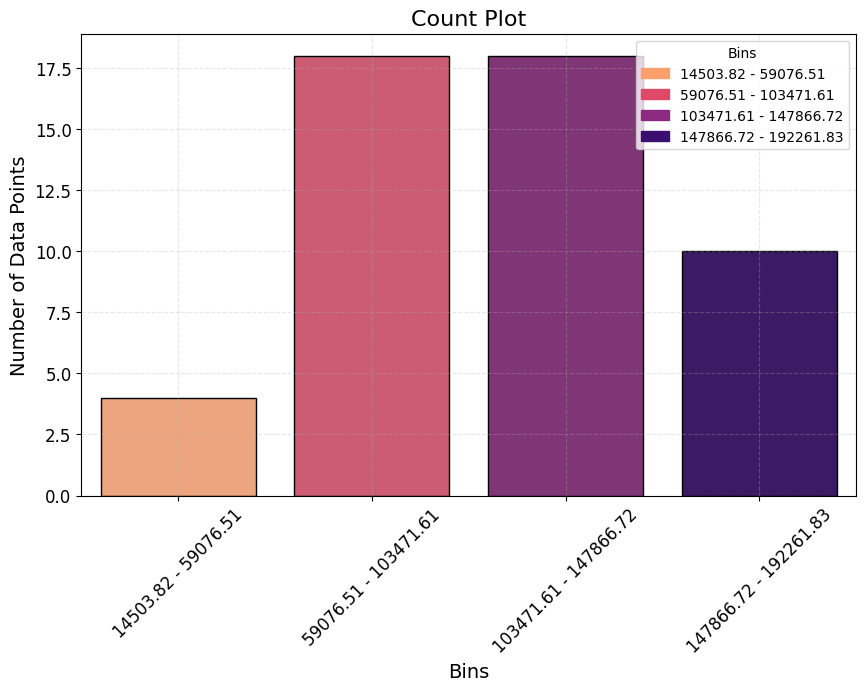

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import logging
from typing import Optional

# Set up logging
logging.basicConfig(level=logging.INFO)

def Check_Balance_Regression(df: pd.DataFrame, y_out: Optional[str] = None, div_number: int = 4) -> pd.DataFrame:
    """
    Check the balance of a regression target variable by binning the data and plotting the distribution.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    y_out (str, optional): The column name for the regression target variable. If None,
                        the function will use the last column of the DataFrame.
    div_number (int): The number of bins to divide the target variable into. Default is 4.
    
    Returns:
    pd.DataFrame: A DataFrame showing the binned data and bin labels.
    
    Raises:
    ValueError: If the specified column does not exist in the DataFrame.
    """
    if y_out is None:
        y_out = df.iloc[:, -1].name
    
    if y_out not in df.columns:
        raise ValueError(f"The column '{y_out}' does not exist in the DataFrame.")
    
    logging.info('Binning the data for column: %s into %d bins', y_out, div_number)
    
    # Bin the data
    binned_data, bin_edges = pd.cut(df[y_out], bins=div_number, retbins=True, labels=False, ordered=True)
    
    # Create readable bin labels
    bin_labels = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]
    temp_df = pd.DataFrame({
        'binned': binned_data,
        'bin_labels': binned_data.map(lambda x: bin_labels[int(x)] if pd.notna(x) else 'NaN')
    })
    
    logging.info('Creating count plot for binned data of column: %s', y_out)
    
    # Plot the data using seaborn countplot
    plt.figure(figsize=(10, 6))  # Set the figure size
    palette = sns.color_palette("magma", len(bin_labels))
    ax= sns.countplot(data=temp_df, x='bin_labels', hue='bin_labels', palette=palette, order=bin_labels, edgecolor='black', legend=False)
    plt.title(f'Count plot of binned regression output for {y_out}')
    plt.xlabel('Bins', fontsize=14)  # Set x-axis label with font size
    plt.ylabel('Number of Data Points', fontsize=14)  # Set y-axis label with font size
    plt.title('Count Plot', fontsize=16)  # Set title with font size
    plt.grid(True, linestyle='--', linewidth=0.8, alpha=0.3)  # Add grid lines with custom style
    plt.xticks(fontsize=12, rotation=45) # Set font size for x-axis ticks
    plt.yticks(fontsize=12)  # Set font size for y-axis ticks
    # Create custom legend
    handles = [Patch(color=palette[(len(bin_labels)-1)-i], label=bin_labels[i]) for i in range(len(bin_labels))]
    ax.legend(handles=handles, title='Bins', loc='upper right')
    plt.show()
    
    # return temp_df

# Example usage
Check_Balance_Regression(df, y_out='Profit', div_number=4)

In [60]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Correlation Coefficient

In [45]:
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
# for param in numeric_columns:
#     pearson_coef, p_value = stats.pearsonr(df[param], df['price'])
#     print(param)
#     print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value,'\n')

# Groupby and pivot

In [46]:
# df_group = df[['R&D Spend','Marketing Spend','Profit']]

# # grouping results
# df_group_one = df_group.groupby(['R&D Spend','Marketing Spend'],as_index=False).mean()
# df_group_one

In [47]:
# grouped_pivot = df_group_one.pivot(index='R&D Spend',columns='Marketing Spend')
# grouped_pivot

In [48]:
# # pcolor
# fig, ax = plt.subplots()
# im = ax.pcolor(grouped_pivot, cmap='RdBu')

# #label names
# row_labels = grouped_pivot.columns.levels[1]
# col_labels = grouped_pivot.index

# #move ticks and labels to the center
# ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
# ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# #insert labels
# ax.set_xticklabels(row_labels, minor=False)
# ax.set_yticklabels(col_labels, minor=False)

# fig.colorbar(im)

# Visualization

## Heatmap

In [49]:
# without str column in dataset
# correlations=df.corr()
# drop str column to get correlations
correlations=df.drop(['State'],axis=1).corr()
correlations

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


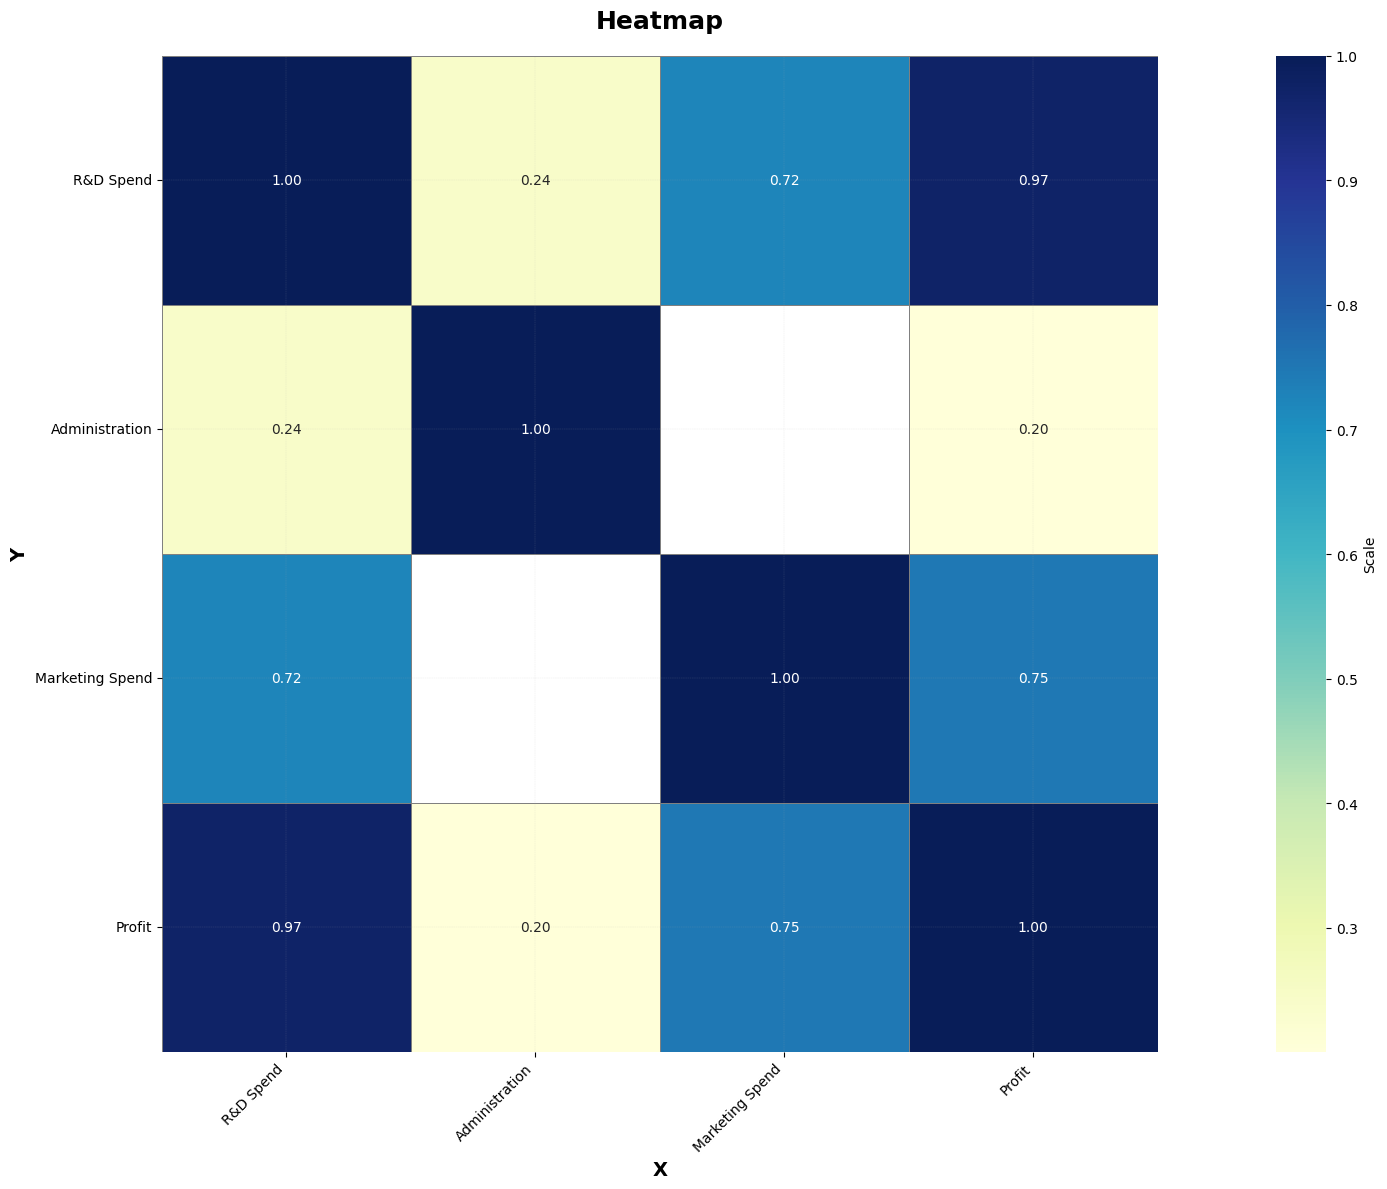

In [50]:
# Create a figure and axis
plt.figure(figsize=(24, 12))

# Create a heatmap with customization
heatmap = sns.heatmap(
    data=correlations,
    annot=True,              # Annotate cells with the data value
    fmt=".2f",               # Format the annotations to 2 decimal places
    cmap="YlGnBu",           # Colormap
    cbar=True,               # Show color bar
    cbar_kws={'label': 'Scale'},  # Color bar customization
    linewidths=0.5,          # Line width between cells
    linecolor='gray',        # Line color between cells
    square=True,             # Force square cells
    mask=correlations<0.1,               # Do not mask any data
    annot_kws={"size": 10},  # Annotation font size
    xticklabels=True,        # Show x-axis labels
    yticklabels=True,        # Show y-axis labels
    robust=True              # Robust colormap limits
)

# Customize the plot
plt.title('Heatmap', fontsize=18, weight='bold', pad=20)
plt.xlabel('X', fontsize=14, weight='bold')
plt.ylabel('Y', fontsize=14, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Adjust layout for better fit
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.3)
# Display the heatmap
plt.show()

## Scatter plot

In [51]:
df.columns.tolist()

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

INFO:root:Creating scatter plot for R&D Spend vs Profit


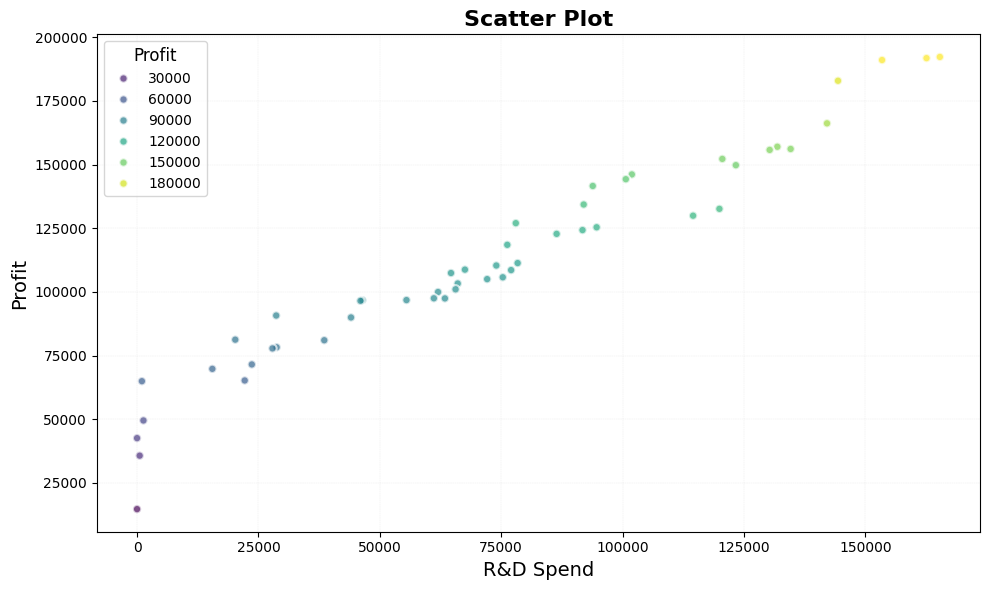

INFO:root:Scatter plot created successfully.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from typing import Optional, Tuple

# Set up logging
logging.basicConfig(level=logging.INFO)

def create_custom_scatter_plot(df: pd.DataFrame, 
                               x_col: str, 
                               y_col: str, 
                               hue_col: Optional[str] = None, 
                               title: str = 'Scatter Plot', 
                               xlabel: Optional[str] = None, 
                               ylabel: Optional[str] = None, 
                               size_range: Tuple[int, int] = (20, 500), 
                               alpha: float = 0.7, 
                               palette: str = 'viridis') -> None:
    """
    Create a customized scatter plot using Seaborn.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to plot.
    x_col (str): The column name for the x-axis values.
    y_col (str): The column name for the y-axis values.
    hue_col (str, optional): The column name for the hue (color coding). Default is None.
    title (str): The title of the plot. Default is 'Scatter Plot'.
    xlabel (str, optional): The label for the x-axis. If None, use the column name. Default is None.
    ylabel (str, optional): The label for the y-axis. If None, use the column name. Default is None.
    size_range (tuple): The range of sizes for the scatter plot points. Default is (20, 500).
    alpha (float): The transparency level of the points. Default is 0.7.
    palette (str): The color palette to use for the plot. Default is 'viridis'.

    Returns:
    None
    """
    if x_col not in df.columns or y_col not in df.columns:
        raise ValueError(f"The specified columns '{x_col}' and/or '{y_col}' do not exist in the DataFrame.")
    
    if hue_col and hue_col not in df.columns:
        raise ValueError(f"The specified hue column '{hue_col}' does not exist in the DataFrame.")
    
    if hue_col is None:
        hue_col = y_col
    
    logging.info('Creating scatter plot for %s vs %s', x_col, y_col)
    
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col,
        palette=palette, 
        sizes=size_range, 
        alpha=alpha, 
        edgecolor='w', 
        linewidth=1.5
    )
    
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(xlabel if xlabel else x_col, fontsize=14)
    plt.ylabel(ylabel if ylabel else y_col, fontsize=14)
    plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.3)
    
    if hue_col:
        plt.legend(title=hue_col, fontsize=10, title_fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    logging.info('Scatter plot created successfully.')

# Example usage
create_custom_scatter_plot(df, x_col='R&D Spend', y_col='Profit')


## Histogram

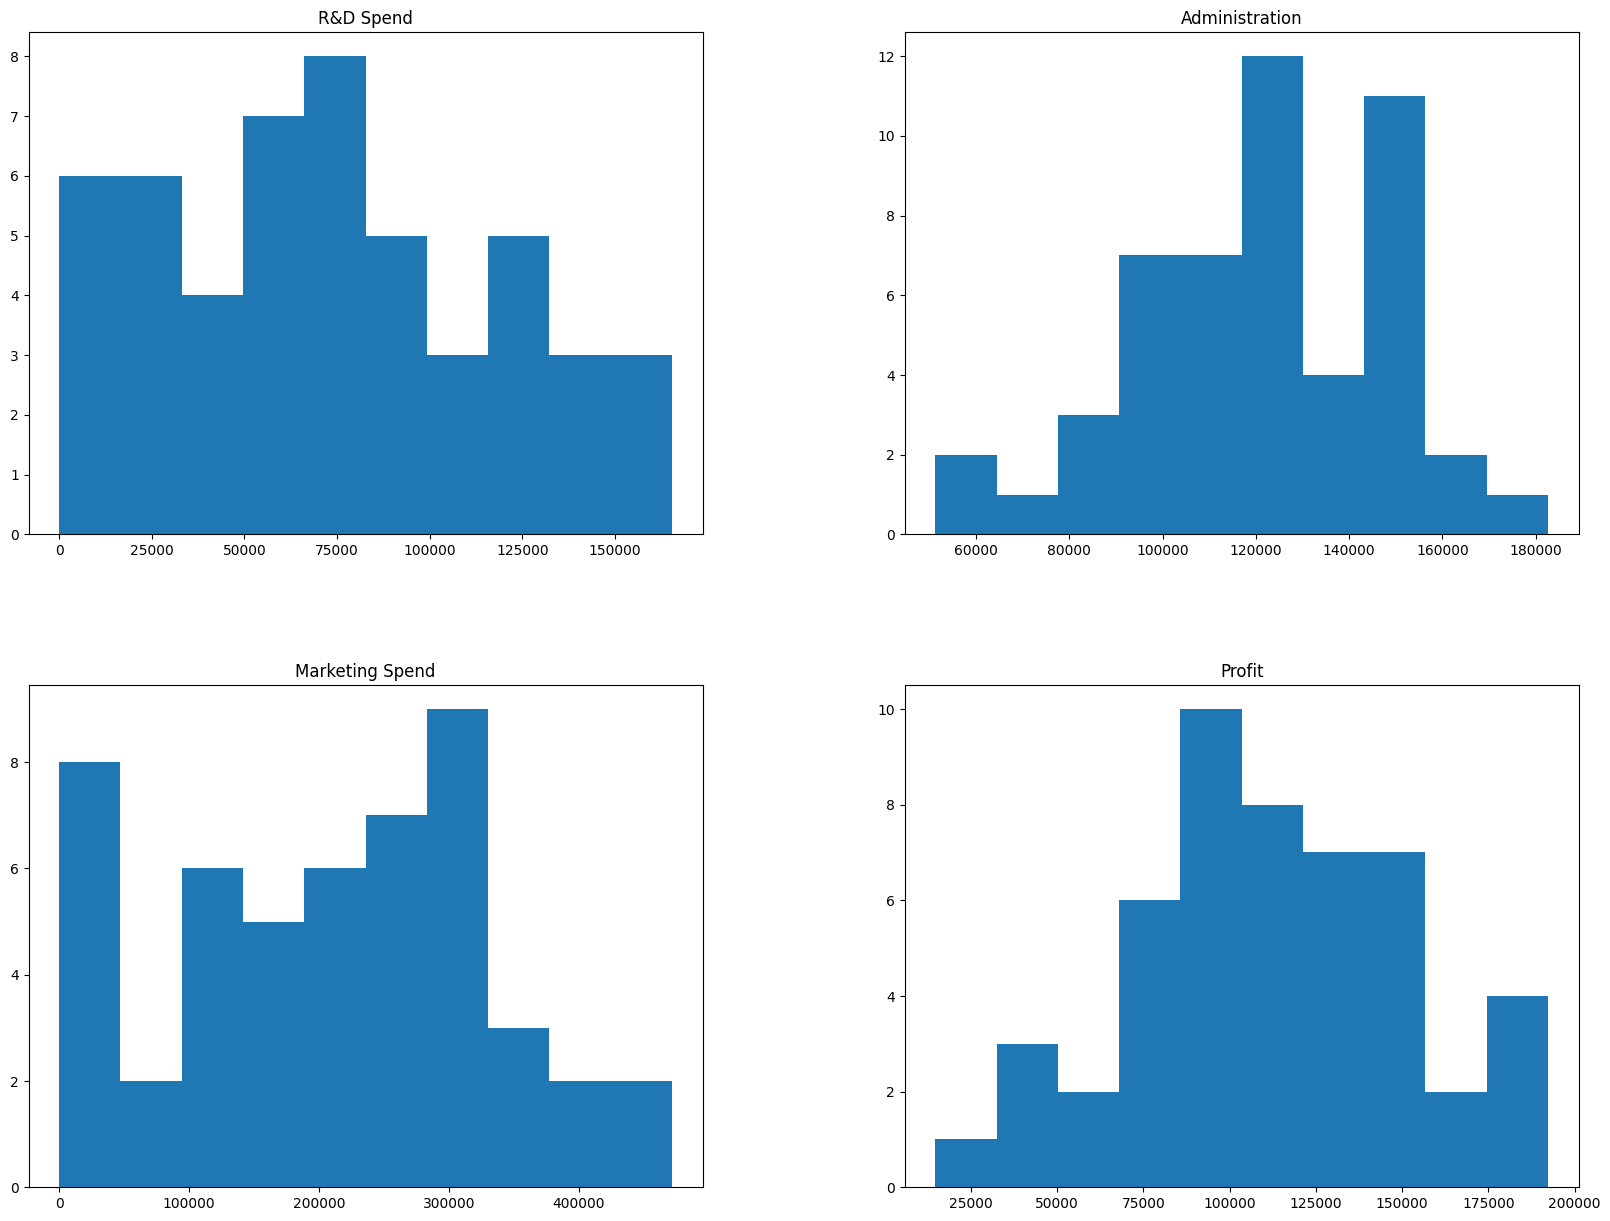

In [53]:
df.hist(figsize=(20,15),grid=False,)
plt.show()

# # or
# fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (8, 6))
# colors = ["#e24a33", "#348abd", "#988ed5", "#777777"] # whatever the colors may be but it should be different for each histogram.
# for index, column in enumerate(correlations.columns):
#     ax = axes.flatten()[index]
#     ax.hist(df[column], color = colors[index], label = column)
#     ax.legend(loc = "best")
# plt.suptitle("Desired Histograms", size = 20)
# plt.show()

## show DataFrame

In [54]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Encoding

## If it have more than two different words

### get_dummies

In [55]:
dummies = []
cols = ['State']
for col in cols:
    dummies.append(pd.get_dummies(df[col], drop_first=True, dtype=float))
titanic_dummies = pd.concat(dummies, axis=1)
df = pd.concat((df, titanic_dummies), axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,1.0,0.0


In [56]:
df=df.drop(cols,axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


### *------------------------------------------------------------------------------------------------------------------*

### LabelEncoder

In [57]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['State'] = le.fit_transform(df['State'])
# df.head()

### If only have two different words.

In [58]:
# df[''].unique()

In [59]:
# df['']=[ 1 if i==''  else 0  for i in df['']]

In [60]:
# df[''].unique()

In [61]:
# df.head()

# get X , Y

In [62]:
x=df.drop('Profit',axis=1)
y=df['Profit']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2, random_state=42)

In [64]:
print(x_train.shape)
print(x_test.shape)

(40, 5)
(10, 5)


In [65]:
print(y_train.shape)
print(y_test.shape)

(40,)
(10,)


# Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Train

## Grid Search

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : [3,5,7,9,11,13] , 'p' : [1,2] , 'weights': ["uniform", "distance"]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, params, scoring='r2', cv=5)  # Set refit=True

# Train the grid search
grid_search.fit(x_train, y_train)  

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [68]:
print("Best Hyperparameter Index:", grid_search.best_index_)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

Best Hyperparameter Index: 1
Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Cross-Validated Score: 0.771318992806291


In [69]:
# Get the model with best hyperparameters
model = grid_search.best_estimator_
y_pred = model.predict(x_test)

## Randomized Search

In [70]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import RandomizedSearchCV

# params = {'n_neighbors' : [3,5,7,9,11,13] , 'p' : [1,2], 'weights': ["uniform", "distance"]}
# knn = KNeighborsRegressor()

# random_search = RandomizedSearchCV(knn, params, scoring='r2', cv=5, random_state=42)

# # Train the random search
# random_search.fit(x_train, y_train)

In [71]:
# print("Best Hyperparameter Index:", random_search.best_index_)
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Cross-Validated Score:", random_search.best_score_)

In [72]:
# model = random_search.best_estimator_
# y_pred = model.predict(x_test)

## Train KNeighborsClassifier without search

In [73]:
# from sklearn.neighbors import KNeighborsRegressor
# model=KNeighborsRegressor(n_neighbors = 5, p = 1, )
# model.fit(x_train, y_train)

In [74]:
# y_pred = model.predict(x_test)

# Evaluate model

## r2_score

In [75]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.1895087291467339

## mean_squared_error

In [76]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

656329406.9372622

## mean_absolute_error

In [77]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

17299.395739829906